## Week 2_Day 3: SVM(Suport Vector Machine)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [6]:
# helper function to plot the decision boundary
def plot_decision_boundary(model, x, y, title=None, h=0.02):
    # X: 2D numpy array (n_samples, 2)
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], x[:, 1], c=y, edgecolors="k")
    if title:
        plt.title(title)
    plt.show()

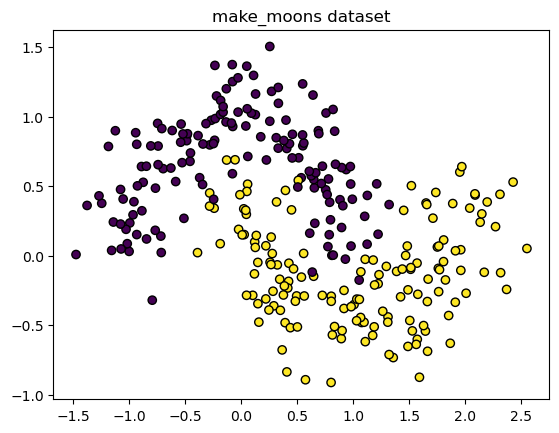

In [5]:
x, y = make_moons(n_samples=300, noise=0.2, random_state=42)

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k")
plt.title("make_moons dataset")
plt.show()

### SVM with Linear Kernel

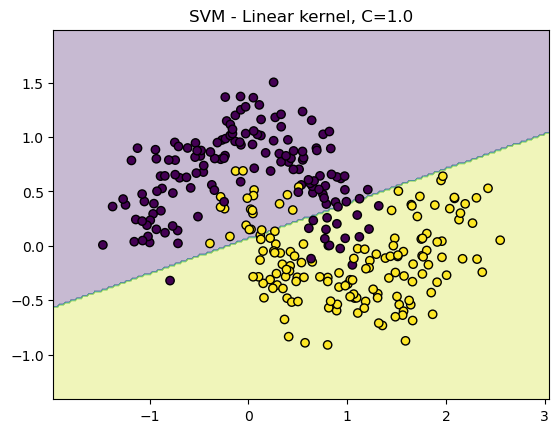

In [8]:
svm_linear = Pipeline([
    ("scaler",StandardScaler()),
    ("svc", SVC(kernel="linear", C=1))
])

svm_linear.fit(x, y)

plot_decision_boundary(svm_linear, x, y, title="SVM - Linear kernel, C=1.0")

### SVM with RBF Kernel

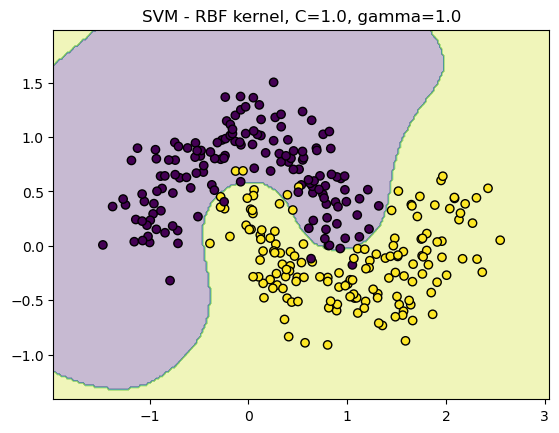

In [12]:
svm_rbf = Pipeline([
    ("scaler",StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1, gamma=1))
])

svm_rbf.fit(x,y)

plot_decision_boundary(svm_rbf, x, y, title="SVM - RBF kernel, C=1.0, gamma=1.0")

### Modifying and Trying multiple value of C 

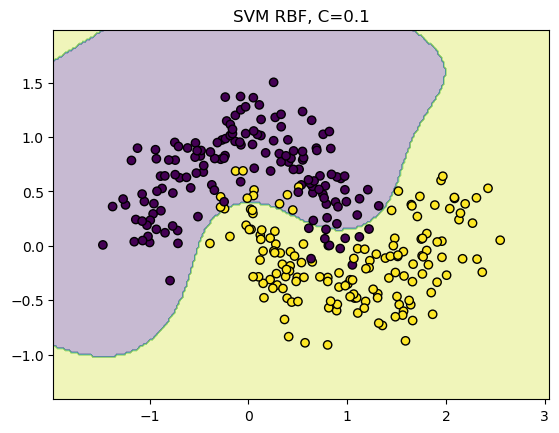

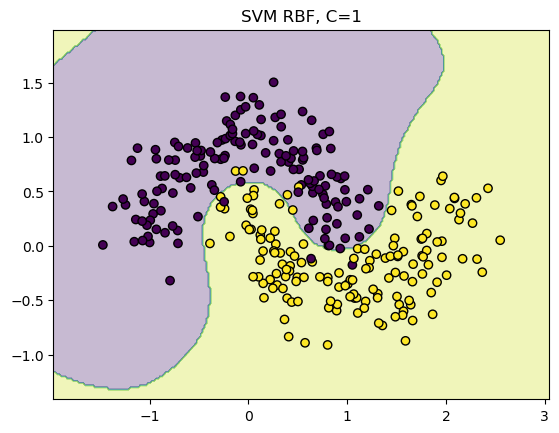

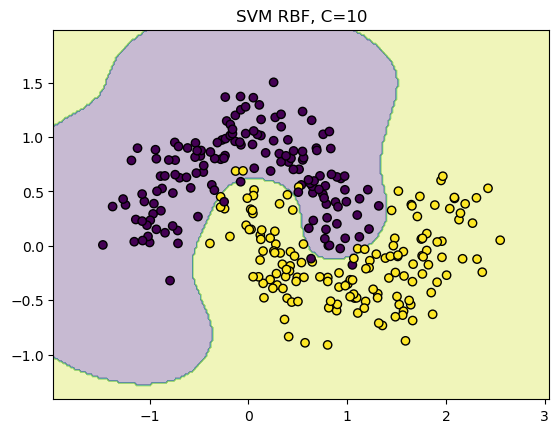

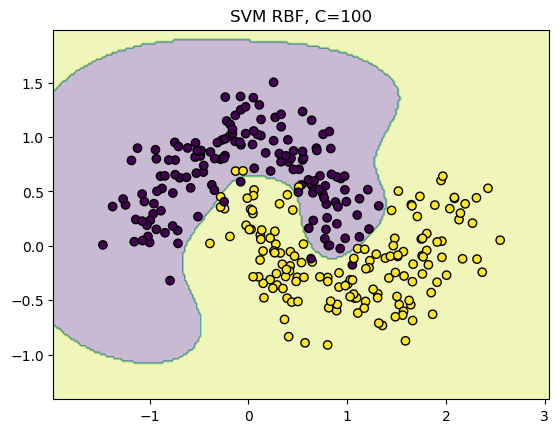

In [13]:
for C in [0.1, 1, 10, 100]:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", C=C, gamma=1.0))
    ])
    model.fit(x, y)
    title = f"SVM RBF, C={C}"
    plot_decision_boundary(model, x, y, title=title)


### Modifying and Trying multiple value of Gamma 

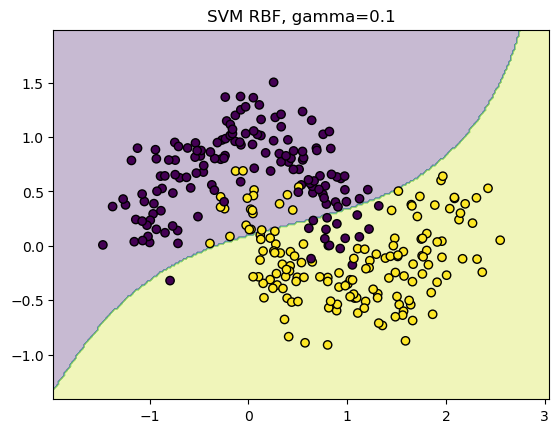

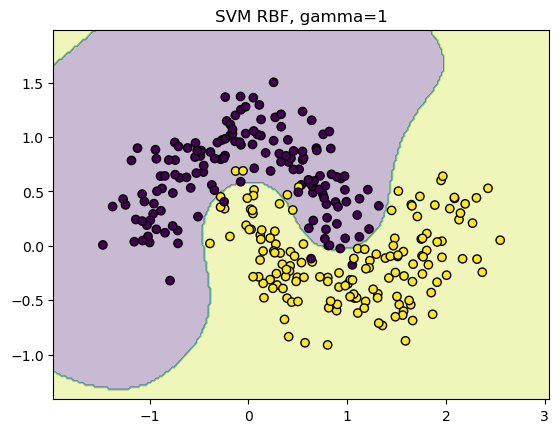

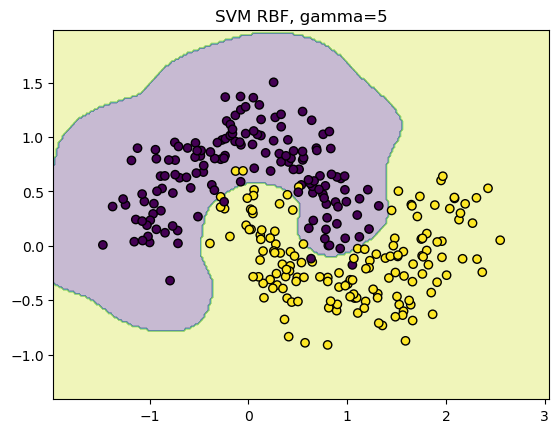

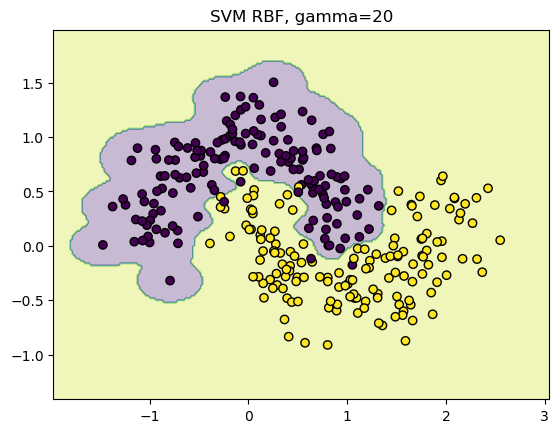

In [15]:
for gamma in [0.1, 1, 5, 20]:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", C=1.0, gamma=gamma))
    ])
    model.fit(X, y)
    title = f"SVM RBF, gamma={gamma}"
    plot_decision_boundary(model, X, y, title=title)

### SVM on a real dataset – Breast Cancer

In [16]:
# dataset load and split
cancer = load_breast_cancer(as_frame=True)
df_c = cancer.frame

X = df_c.drop(columns=["target"])
y = df_c["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
# Build an SVM pipeline (RBF kernel)
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale"))
])

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", acc)

Test accuracy: 0.9824561403508771


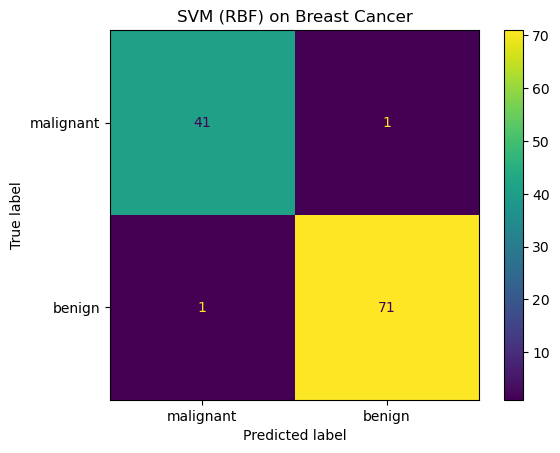

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot()
plt.title("SVM (RBF) on Breast Cancer")
plt.show()

In [20]:
# Hyperparameter experiment on the breast-cancer dataset
params = [
    (0.1, 0.01),
    (1.0, 0.01),
    (1.0, 0.1),
    (10.0, 0.1),
    (10.0, 1.0),
]

for C, gamma in params:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", C=C, gamma=gamma))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"C={C:<4}, gamma={gamma:<4} -> accuracy={acc:.4f}")


C=0.1 , gamma=0.01 -> accuracy=0.9561
C=1.0 , gamma=0.01 -> accuracy=0.9825
C=1.0 , gamma=0.1  -> accuracy=0.9561
C=10.0, gamma=0.1  -> accuracy=0.9474
C=10.0, gamma=1.0  -> accuracy=0.6316


## ✅ Summary of SVM (RBF Kernel) Performance on the Breast Cancer Dataset

I tested the following (C, gamma) combinations:

C	gamma	Accuracy
0.1	0.01	0.9561
1.0	0.01	0.9825 ← 🏆 Best
1.0	0.1	0.9561
10.0	0.1	0.9474
10.0	1.0	0.6316

Based on these results, we can interpret the SVM behavior as follows:

### 🟦 1. Best performing hyperparameters

The best accuracy (98.25%) was achieved with:

C = 1.0

gamma = 0.01

This combination provides a very strong generalization on the test set.

### 🟩 2. What these values tell us about the model
✔ Optimal C (C = 1.0)

Balanced soft margin.

Not too strict, not too lenient.

Allows some mistakes but still finds a good margin.

Avoids overfitting.

✔ Optimal gamma (gamma = 0.01)

Small gamma → smooth decision boundary.

Points influence a wider area (less wiggly/complex boundary).

Works well for this dataset because breast cancer features tend to be highly informative and not too noisy.

### 🟥 3. Why some combinations performed worse
❌ High C + high gamma (C = 10, gamma = 1.0 → accuracy = 0.63)

This combination creates a very complex, very wiggly boundary:

High C = model tries to classify every single training point perfectly → overfits.

High gamma = points only influence tiny local areas → even more overfitting.

Overfitting destroys generalization → poor test accuracy.

This shows classic high-variance behavior.

❌ Moderate C but high gamma (C = 1, gamma = 0.1)

Still more wiggly than needed.

Slight drop from 0.9825 → 0.9561.

Gamma is usually the biggest factor controlling boundary complexity.

❌ High C but moderate gamma (C = 10, gamma = 0.1)

Still overfits on training data.

Accuracy drops to 0.9474.

### 🟧 4. What this means for real-world modeling

On real data:

Moderate C (around 1.0) is often best.

Small gamma helps avoid overfitting, especially when features are many (breast cancer dataset has 30 features).

Very large gamma values almost always lead to poor generalization.

High C values make SVM sensitive to noise.

Your results perfectly reflect these principles.

### 🧠 Final Interpretation

The breast cancer dataset is best handled by an SVM with a smooth, generalized decision boundary rather than a highly complex one.

Because:

Features are strong and meaningful

Noise is relatively low

Balanced generalization works best

So an SVM with C = 1.0 and gamma = 0.01 gives the best real-world performance.